https://codetorial.net/tensorflow/basics_of_optimizer.html

### 4. 옵티마이저 사용하기
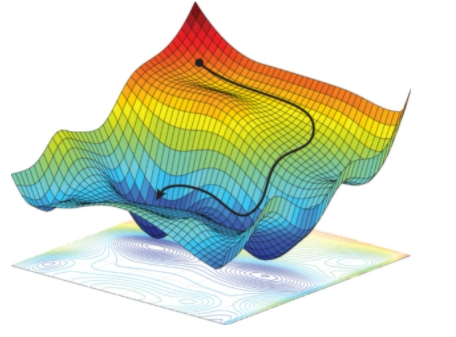

#### 옵티마이저 (Optimizer)는 손실 함수을 통해 얻은 손실값으로부터 모델을 업데이트하는 방식
#### TensorFlow는 SGD, Adam, RMSprop과 같은 다양한 종류의 옵티마이저를 제공
#### 옵티마이저에 따라 모델의 손실값이 어떻게 감소하는지 확인해야 함.

1) Neural Network 구성하기

2) Neural Network 컴파일하기

3) Neural Network 훈련하기

4) 손실값 시각화하기

5) 출력값 시각화하기

6) 옵티마이저 비교하기

In [1]:
#. 1 Neural Network 구성하기
# 1개의 입력, 3개의 출력 노드를 갖는 신경망 모델을 구성

import tensorflow as tf
from tensorflow import keras
import numpy as np

# random 시드 설정
tf.random.set_seed(0)

model = keras.Sequential([keras.layers.Dense(units=3, input_shape=[1])])

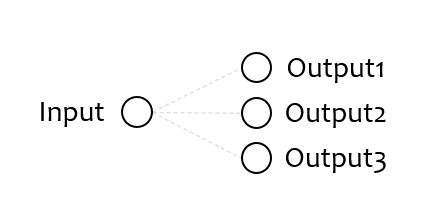

In [2]:
# 2. Neural Network 컴파일하기
# mse 손실 함수 사용. 옵티마이져 추가 
model.compile(loss='mse', optimizer='SGD')

# Stochastic Gradient Descent(SGD) : 확률적 경사하강법

In [6]:
# 3. Neural Network 훈련하기
#  fit는 훈련과 동시에 loss를 확인할 수 있다.
history = model.fit([1], [[0, 1, 0]], epochs=100)

# 결과 : 1회차 때, loss가 1.0738, 2회차 때는 1.0453로 점점 손실함수 오차가 줄어들고 있다.

Epoch 1/100
1/1 [==============================] - 0s 4ms/step - loss: 1.0176
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 0.9907
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 0.9644
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 0.9389
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 0.9140
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 0.8898
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 0.8662
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 0.8433
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 0.8210
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 0.7992
Epoch 11/100
1/1 [==============================] - 0s 5ms/step - loss: 0.7780
Epoch 12/100
1/1 [==============================] - 0s 5ms/step - loss: 0.7574
Epoch 13/100
1/1 [==============================] - 0s 5ms/st

In [7]:
# 4. Neural Network 손실 계산하기
# 최종적으로 훈련한 이후, 최종 계산된 손실 함수 값을 확인한다.
# 참고로 evaluate를 사용할 때에도 1번의 훈련이 이뤄진다.
model.evaluate([1], [[0, 1, 0]])
# 결과 1.0176361799240112

1/1 [==============================] - 0s 29ms/step - loss: 0.0695


0.06945184618234634

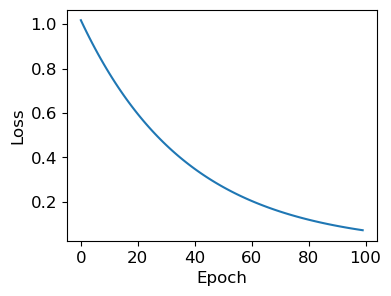

In [8]:
# 4. 손실값 시각화하기
import matplotlib.pyplot as plt

plt.style.use('default')
plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['font.size'] = 12

loss = history.history['loss']
plt.plot(loss)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# fit() 메서드는 History 객체를 반환

# History 객체의 history 속성은 훈련 과정의 손실값 (loss values)과 지표 (metrics)를 포함

# 컴파일 과정에서 지표를 지정하지 않았기 때문에 이 예제의 history 속성은 지표 (metrics)를 포함하지 않음

# 훈련 과정의 손실값을 Matplotlib을 이용해서 그래프로 나타내면 아래와 같이 감소하는 경향을 확인

In [11]:
# 5. 출력값 시각화하기

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('default')
plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['font.size'] = 12

tf.random.set_seed(0)

model = keras.Sequential([keras.layers.Dense(units=3, input_shape=[1], use_bias=False)])
model.compile(loss='mse', optimizer='SGD')

pred = model.predict([1])
print(pred)
print(model.get_weights())

plt.bar(np.arange(3), pred[0])
plt.ylim(-1.1, 1.1)
plt.xlabel('Output Node')
plt.ylabel('Output')
plt.text(-0.4, 0.8, 'Epoch 0')
plt.tight_layout()
## plt 폴더가 없으면 에러 발생, 미리 생성한다.
plt.savefig('./plt/pred000.png')
plt.clf()

epochs = 500
for i in range(1, epochs+1):
  model.fit([1], [[0, 1, 0]], epochs=1, verbose=0)
  pred = model.predict([1])

  if i % 25 == 0:
      plt.bar(np.arange(3), pred[0])
      plt.ylim(-1.1, 1.1)
      plt.xlabel('Output Node')
      plt.ylabel('Output')
      plt.text(-0.4, 0.8, 'Epoch ' + str(i))
      plt.tight_layout()
      plt.savefig('./plt/pred' + str(i).zfill(3) + '.png')
      plt.clf()

print(pred)
print(model.get_weights())

[[-0.5095548  -0.7187625   0.08668923]]
[array([[-0.5095548 , -0.7187625 ,  0.08668923]], dtype=float32)]
[[-0.0179761   0.9393657   0.00305823]]
[array([[-0.0179761 ,  0.9393657 ,  0.00305823]], dtype=float32)]


<Figure size 400x300 with 0 Axes>

### 아미지를 애니메이션으로 만들어 놓으면 점점 예측하여 내놓은 출력값이 Target 값에 [0, 1, 0]에 가까워진다.
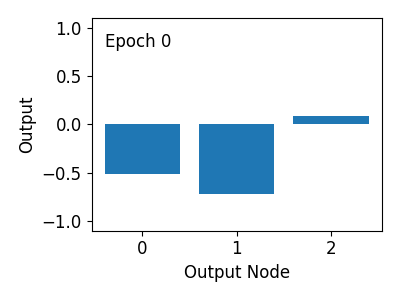
#### 500회의 에포크 동안 훈련에 의해 출력값이 변화하는 과정
#### 옵티마이져가 달라지면 횟수에 다른 손실값이 달라진다.

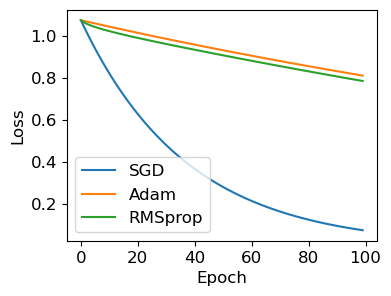

In [13]:
# 6. 옵티마이저 비교하기
#세가지 옵티마이저 ‘SGD’, ‘Adam’, ‘RMSprop’이 모델을 업데이트하는 성능을 비교

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('default')
plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['font.size'] = 12

tf.random.set_seed(0)
model = keras.Sequential([keras.layers.Dense(units=3, input_shape=[1])])

tf.random.set_seed(0)
model2 = tf.keras.models.clone_model(model)

tf.random.set_seed(0)
model3 = tf.keras.models.clone_model(model)

model.compile(loss='mse', optimizer='SGD')
model2.compile(loss='mse', optimizer='Adam')
model3.compile(loss='mse', optimizer='RMSprop')

history = model.fit([1], [[0, 1, 0]], epochs=100, verbose=0)
history2 = model2.fit([1], [[0, 1, 0]], epochs=100, verbose=0)
history3 = model3.fit([1], [[0, 1, 0]], epochs=100, verbose=0)

loss = history.history['loss']
loss2 = history2.history['loss']
loss3 = history3.history['loss']
plt.plot(loss, label='SGD')
plt.plot(loss2, label='Adam')
plt.plot(loss3, label='RMSprop')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower left')
plt.show()



In [ ]:
### 옵티마이저에 따라 모델을 업데이트하는 방식과 손실값이 감소하는 경향에 차이가 있음을 알 수 있다
# 코드 결과 : 100회 학습 실행 시, SGC : 0.1 이하의 손실이 있고, Adam, RMSprop는 약 0.8 정도의 손실이 있다.
# 결과 : SGD 옵티마이저는 Adam, RMSprop보다 현격하게 손실이 적다. 나머지 옵티마이저는 20%만 예측에 성공했다.

# 성과 : SGC 옵티마이저를 통해서 입력값이 1일 때, 출력이 [0, 1, 0]인 [그 무언가]것을 예측할 수 있었다. 
# 한계1 : 도대체 어떤 과정을 거쳐서, 어떤 방법으로 이 출력을 예측하는지 설명할 수 없다.
# 한계2 : 각 옵티마이저가 어떤 식으로 영향을 구체적으로 주는지 이해할 수 없다.

# 의심1 : 문제에 다라서 Adam, RMSprop가 활약하는 분야는 없는가?
# 의심2 : SGC보다 뛰어나고 보편적인 옵티마이저는 없는가?